In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
import glob
import json
import gzip
import pandas as pd

data_dir = '/home/reaf/MOT-analysis/notebooks/mot_data/'
json_files = glob.glob(os.path.join(data_dir, '*.json.gz'))
all_data = []

for i, file_path in enumerate(json_files):

    if i % 100 == 0 and i > 0:
        break
    try:
        file_records = []
        with gzip.open(file_path, 'rt', encoding='utf-8') as f:
            for i, line in enumerate(f):
                try:
                    if line.strip():  
                        record = json.loads(line)
                        file_records.append(record)
                except json.JSONDecodeError as e:
                    print(f"Error in {os.path.basename(file_path)}, line {i+1}: {str(e)[:100]}")
                    continue
        
        all_data.extend(file_records)
        print(f"Loaded: {os.path.basename(file_path)} - {len(file_records)} records")
    except Exception as e:
        print(f"Failed to process {os.path.basename(file_path)}: {str(e)[:100]}")

# Create DataFrame
if all_data:
    df = pd.DataFrame(all_data)
    
else:
    print("No data was successfully loaded.")

Loaded: delta-light-vehicle_24-03-2025_171.json.gz - 15 records
Loaded: delta-light-vehicle_25-03-2025_265.json.gz - 506 records
Loaded: delta-light-vehicle_25-03-2025_142.json.gz - 499 records
Loaded: delta-light-vehicle_25-03-2025_363.json.gz - 363 records
Loaded: delta-light-vehicle_24-03-2025_24.json.gz - 9 records
Loaded: delta-light-vehicle_24-03-2025_70.json.gz - 6 records
Loaded: delta-light-vehicle_25-03-2025_285.json.gz - 491 records
Loaded: delta-light-vehicle_25-03-2025_196.json.gz - 456 records
Loaded: delta-light-vehicle_24-03-2025_150.json.gz - 6 records
Loaded: delta-light-vehicle_24-03-2025_104.json.gz - 10 records
Loaded: delta-light-vehicle_25-03-2025_165.json.gz - 497 records
Loaded: delta-light-vehicle_24-03-2025_345.json.gz - 12 records
Loaded: delta-light-vehicle_25-03-2025_369.json.gz - 450 records
Loaded: delta-light-vehicle_24-03-2025_128.json.gz - 4 records
Loaded: delta-light-vehicle_24-03-2025_9.json.gz - 5 records
Loaded: delta-light-vehicle_24-03-2025_203

Cars I am looking at (small hatchback):

- ford fiesta mk6: 2008-2017
- toyota yaris mk3: 2011-2020
- mazda2 mk2: 2007-2014
- panda 312: 2011-
- vw polo mk5: 2009-2017



In [3]:
df.head()

,registration,firstUsedDate,registrationDate,manufactureDate,primaryColour,secondaryColour,engineSize,model,make,fuelType,lastMotTestDate,motTests,lastUpdateTimestamp,dataSource,lastUpdateDate,lastRunDate,lastRunTimestamp,modification
0,L13UMG,2008-08-08,2008-08-08,2008-08-08,White,Not Stated,1596.0,FIESTA,FORD,Petrol,2025-03-23T15:24:56.000Z,"[{'completedDate': '2011-08-30T14:52:54.000Z',...",2025-03-23 15:24:56.000000,dvsa,2025-03-23,2025-03-24,2025-03-24 05:29:23.392803,UPDATED
1,RA07HSZ,2007-08-08,2007-08-08,2007-08-08,Silver,Not Stated,2460.0,TRANSPORTER,VOLKSWAGEN,Diesel,2025-03-23T10:16:40.000Z,"[{'completedDate': '2010-09-08T17:31:31.000Z',...",2025-03-23 10:16:40.000000,dvsa,2025-03-23,2025-03-24,2025-03-24 05:29:23.392803,UPDATED
2,YA17USZ,2017-06-29,2017-06-29,2017-06-29,Blue,Not Stated,1995.0,320,BMW,Diesel,2025-03-23T11:44:47.000Z,"[{'completedDate': '2020-06-21T06:58:49.000Z',...",2025-03-23 11:44:47.000000,dvsa,2025-03-23,2025-03-24,2025-03-24 05:29:23.392803,UPDATED
3,NU10MPO,2010-03-19,2010-03-19,2010-03-19,Blue,Not Stated,1598.0,MINI,MINI,Petrol,2025-03-23T16:56:58.000Z,"[{'completedDate': '2013-03-22T09:56:43.000Z',...",2025-03-23 16:56:58.000000,dvsa,2025-03-23,2025-03-24,2025-03-24 05:29:23.392803,UPDATED
4,WO18VNJ,2018-06-22,2018-06-22,2018-06-22,White,Not Stated,1242.0,500,FIAT,Petrol,2025-03-23T13:03:18.000Z,"[{'completedDate': '2021-06-03T08:37:46.000Z',...",2025-03-23 13:03:18.000000,dvsa,2025-03-23,2025-03-24,2025-03-24 05:29:23.392803,UPDATED


In [4]:
df_copy = df.copy()

In [5]:
df['registrationDate'] = pd.to_datetime(df['registrationDate'])
df['manufactureDate'] = pd.to_datetime(df['manufactureDate'])
df['firstUsedDate'] = pd.to_datetime(df['firstUsedDate'])


In [6]:
ford_fiesta = df[(df["model"] == "FIESTA") &  (df["make"] == "FORD")].copy()
# Filter for Ford Fiesta mk6 (2008-2017)
ford_fiesta_mk6 = ford_fiesta[(ford_fiesta["registrationDate"] >= pd.to_datetime('2008-01-01')) & 
                             (ford_fiesta["registrationDate"] <= pd.to_datetime('2017-12-31'))]

In [7]:
mazda_2 = df[(df["model"] == "2") & (df["make"] == "MAZDA")].copy()
mazda_2_mk2 = mazda_2[(mazda_2["registrationDate"] >= pd.to_datetime('2007-01-01')) & 
                             (mazda_2["registrationDate"] <= pd.to_datetime('2014-12-31'))]

In [8]:
toyota_yaris = df[(df["model"] == "YARIS") & (df["make"] == "TOYOTA")].copy()
toyota_yaris_mk3 = toyota_yaris[(toyota_yaris["registrationDate"] >= pd.to_datetime('2011-01-01')) & 
                             (toyota_yaris["registrationDate"] <= pd.to_datetime('2020-12-31'))]

In [9]:
fiat_panda = df[(df["model"] == "PANDA") & (df["make"] == "FIAT")].copy()
fiat_panda_mk4 = fiat_panda[(fiat_panda["registrationDate"] >= pd.to_datetime('2011-01-01')) & 
                             (fiat_panda["registrationDate"] <= pd.to_datetime('2020-12-31'))]

In [10]:
vw_polo = df[(df["model"] == "POLO") & (df["make"] == "VOLKSWAGEN")].copy()
vw_polo_mk5 = vw_polo[(vw_polo["registrationDate"] >= pd.to_datetime('2009-01-01')) & 
                             (vw_polo["registrationDate"] <= pd.to_datetime('2017-12-31'))]

In [11]:
ford_fiesta_mk6.head()

,registration,firstUsedDate,registrationDate,manufactureDate,primaryColour,secondaryColour,engineSize,model,make,fuelType,lastMotTestDate,motTests,lastUpdateTimestamp,dataSource,lastUpdateDate,lastRunDate,lastRunTimestamp,modification
0,L13UMG,2008-08-08,2008-08-08,2008-08-08,White,Not Stated,1596.0,FIESTA,FORD,Petrol,2025-03-23T15:24:56.000Z,"[{'completedDate': '2011-08-30T14:52:54.000Z',...",2025-03-23 15:24:56.000000,dvsa,2025-03-23,2025-03-24,2025-03-24 05:29:23.392803,UPDATED
19,WV13UXH,2013-04-09,2013-04-09,2013-04-09,Black,Not Stated,1499.0,FIESTA,FORD,Diesel,2025-03-24T12:14:40.000Z,"[{'completedDate': '2016-03-15T16:46:07.000Z',...",2025-03-24 12:14:40.000000,dvsa,2025-03-24,2025-03-25,2025-03-25 05:27:04.334721,UPDATED
34,SJ15LTA,2015-03-31,2015-03-31,2015-03-31,Blue,Not Stated,1242.0,FIESTA,FORD,Petrol,2025-03-24T10:53:19.000Z,"[{'completedDate': '2018-09-17T15:03:52.000Z',...",2025-03-24 10:53:19.000000,dvsa,2025-03-24,2025-03-25,2025-03-25 05:27:04.334721,UPDATED
159,SV59NYP,2009-09-04,2009-09-04,2009-09-04,Red,Not Stated,1242.0,FIESTA,FORD,Petrol,2025-03-24T15:53:32.000Z,"[{'completedDate': '2012-08-13T09:06:10.000Z',...",2025-03-24 15:53:32.000000,dvsa,2025-03-24,2025-03-25,2025-03-25 05:27:04.334721,UPDATED
229,MH08RAN,2011-03-29,2011-03-29,2011-03-29,White,Not Stated,1242.0,FIESTA,FORD,Petrol,2025-03-24T18:44:53.000Z,"[{'completedDate': '2014-03-25T14:30:07.000Z',...",2025-03-24 18:44:53.000000,dvsa,2025-03-24,2025-03-25,2025-03-25 05:27:04.334721,UPDATED


In [14]:
# Let's parse the motTests column from ford_fiesta_mk6 dataframe
# First, let's check a single sample to understand the structure
sample_mot_tests = ford_fiesta_mk6['motTests'].iloc[0]

# Creating a function to parse the motTests column
def parse_mot_tests(df):
    # Create a new dataframe to store flattened MOT test data
    mot_data = []
    
    for idx, row in df.iterrows():
        registration = row['registration']
        registration_date = row['registrationDate']
        mot_tests = eval(row['motTests']) if isinstance(row['motTests'], str) else row['motTests']
        
        for test in mot_tests:
            completed_date = pd.to_datetime(test.get('completedDate', None))
            
            # Calculate age of car at test time (in years)
            if pd.notnull(completed_date) and pd.notnull(registration_date):
                car_age_years = (completed_date.replace(tzinfo=None) - registration_date.replace(tzinfo=None)).days / 365.25
            else:
                car_age_years = None
                
            # Extract defects
            defects = test.get('defects', [])
            defect_list = []
            for defect in defects:
                defect_info = {
                    'type': defect.get('type', None),
                    'text': defect.get('text', None),
                    'dangerous': defect.get('dangerous', False),
                    'defectCategory': defect.get('defectCategory', None)
                }
                defect_list.append(defect_info)
            
            test_data = {
                'registration': registration,
                'completedDate': completed_date,
                'testResult': test.get('testResult', None),
                'odometerValue': test.get('odometerValue', None),
                'odometerUnit': test.get('odometerUnit', None),
                'motTestNumber': test.get('motTestNumber', None),
                'carAgeYears': car_age_years,
                'defects': defect_list,
                'defectCount': len(defect_list)
            }
            mot_data.append(test_data)
    
    # Create DataFrame from the list of dictionaries
    mot_df = pd.DataFrame(mot_data)
    return mot_df

# Apply the function to parse MOT test data
ford_fiesta_mot_tests = parse_mot_tests(ford_fiesta_mk6)

# Display the first few rows of the parsed data
print(f"Total MOT test records: {len(ford_fiesta_mot_tests)}")
ford_fiesta_mot_tests.head()

Total MOT test records: 8211


,registration,completedDate,testResult,odometerValue,odometerUnit,motTestNumber,carAgeYears,defects,defectCount
0,L13UMG,2011-08-30 14:52:54+00:00,PASSED,18135.0,MI,None,3.058179,"[{'type': 'ADVISORY', 'text': 'Offside Rear Ty...",1
1,L13UMG,2012-12-17 14:27:32+00:00,PASSED,26910.0,MI,None,4.358658,[],0
2,L13UMG,2013-11-23 09:39:17+00:00,FAILED,41314.0,MI,None,5.292266,"[{'type': 'FAIL', 'text': 'Nearside Front Fron...",6
3,L13UMG,2013-11-23 12:02:07+00:00,PASSED,41314.0,MI,None,5.292266,[],0
4,L13UMG,2015-01-05 10:48:06+00:00,FAILED,63293.0,MI,None,6.409309,"[{'type': 'FAIL', 'text': 'Anti-lock braking s...",3


In [17]:
ford_fiesta_mot_tests


,registration,completedDate,testResult,odometerValue,odometerUnit,motTestNumber,carAgeYears,defects,defectCount
0,L13UMG,2011-08-30 14:52:54+00:00,PASSED,18135.0,MI,None,3.058179,"[{'type': 'ADVISORY', 'text': 'Offside Rear Ty...",1
1,L13UMG,2012-12-17 14:27:32+00:00,PASSED,26910.0,MI,None,4.358658,[],0
2,L13UMG,2013-11-23 09:39:17+00:00,FAILED,41314.0,MI,None,5.292266,"[{'type': 'FAIL', 'text': 'Nearside Front Fron...",6
3,L13UMG,2013-11-23 12:02:07+00:00,PASSED,41314.0,MI,None,5.292266,[],0
4,L13UMG,2015-01-05 10:48:06+00:00,FAILED,63293.0,MI,None,6.409309,"[{'type': 'FAIL', 'text': 'Anti-lock braking s...",3
...,...,...,...,...,...,...,...,...,...
8206,VK09NFG,2023-03-21 07:34:36+00:00,PASSED,76087.0,MI,None,13.875428,"[{'type': 'ADVISORY', 'text': 'Exhaust has a m...",2
8207,VK09NFG,2024-03-26 07:38:59+00:00,FAILED,79610.0,MI,None,14.891170,"[{'type': 'PRS', 'text': 'Nearside Position la...",2
8208,VK09NFG,2024-03-26 07:39:00+00:00,PASSED,79610.0,MI,None,14.891170,[],0
8209,VK09NFG,2025-03-24 06:35:55+00:00,FAILED,88780.0,MI,None,15.885010,"[{'type': 'FAIL', 'text': 'Engine MIL inoperat...",11


In [20]:
def extract_defect_details(mot_df):
    """
    Extract detailed information about defects from MOT test data
    including car age, mileage, and defect types.
    """
    defect_details = []
    
    for _, row in mot_df.iterrows():
        # Skip if there are no defects
        if row['defectCount'] == 0:
            continue
        
        # Extract basic test information
        car_age = row['carAgeYears']
        mileage = row['odometerValue']
        test_date = row['completedDate']
        test_result = row['testResult']
        registration = row['registration']
        
        # Process each defect in the test
        defects = row['defects']
        for defect in defects:
            defect_type = defect.get('type', 'Unknown')
            defect_text = defect.get('text', 'No description')
            defect_category = defect.get('defectCategory', 'Not categorized')
            dangerous = defect.get('dangerous', False)
            
            # Determine component category from text
            component = 'Other'
            text_lower = defect_text.lower()
            if any(word in text_lower for word in ['tyre', 'wheel']):
                component = 'Tyres/Wheels'
            elif any(word in text_lower for word in ['brake', 'abs']):
                component = 'Brakes'
            elif any(word in text_lower for word in ['suspension', 'shock', 'spring']):
                component = 'Suspension'
            elif any(word in text_lower for word in ['steering']):
                component = 'Steering'
            elif any(word in text_lower for word in ['light', 'lamp', 'beam']):
                component = 'Lights'
            elif any(word in text_lower for word in ['exhaust', 'emission']):
                component = 'Exhaust'
            elif any(word in text_lower for word in ['rust', 'corrosion']):
                component = 'Corrosion'
            elif any(word in text_lower for word in ['wiper', 'windscreen', 'window']):
                component = 'Visibility'
            
            defect_details.append({
                'registration': registration,
                'test_date': test_date,
                'test_result': test_result,
                'car_age_years': car_age,
                'mileage': mileage,
                'defect_type': defect_type,
                'defect_text': defect_text,
                'component': component,
                'dangerous': dangerous
            })
    
    # Convert to DataFrame
    defects_df = pd.DataFrame(defect_details)
    return defects_df

# Extract detailed defect information from Ford Fiesta MOT tests
ford_fiesta_defects = extract_defect_details(ford_fiesta_mot_tests)

# Display basic statistics
print(f"Total defects found: {len(ford_fiesta_defects)}")
print(f"Defect types distribution:\n{ford_fiesta_defects['defect_type'].value_counts()}")
print(f"Component categories distribution:\n{ford_fiesta_defects['component'].value_counts()}")

# Show the first few rows
ford_fiesta_defects.head()

Total defects found: 15540
Defect types distribution:
defect_type
ADVISORY        10680
FAIL             3309
PRS               704
MINOR             512
USER ENTERED      335
Name: count, dtype: int64
Component categories distribution:
component
Tyres/Wheels    5001
Lights          2499
Brakes          2495
Other           2243
Suspension      1820
Exhaust          740
Visibility       502
Steering         216
Corrosion         24
Name: count, dtype: int64


,registration,test_date,test_result,car_age_years,mileage,defect_type,defect_text,component,dangerous
0,L13UMG,2011-08-30 14:52:54+00:00,PASSED,3.058179,18135.0,ADVISORY,Offside Rear Tyre worn close to the legal limi...,Tyres/Wheels,False
1,L13UMG,2013-11-23 09:39:17+00:00,FAILED,5.292266,41314.0,FAIL,Nearside Front Front position lamp(s) not work...,Lights,False
2,L13UMG,2013-11-23 09:39:17+00:00,FAILED,5.292266,41314.0,FAIL,Nearside Front Tyre tread depth below requirem...,Tyres/Wheels,False
3,L13UMG,2013-11-23 09:39:17+00:00,FAILED,5.292266,41314.0,FAIL,Nearside Front brake disc in such a condition ...,Brakes,False
4,L13UMG,2013-11-23 09:39:17+00:00,FAILED,5.292266,41314.0,FAIL,Nearside Rear Tyre tread depth below requireme...,Tyres/Wheels,False


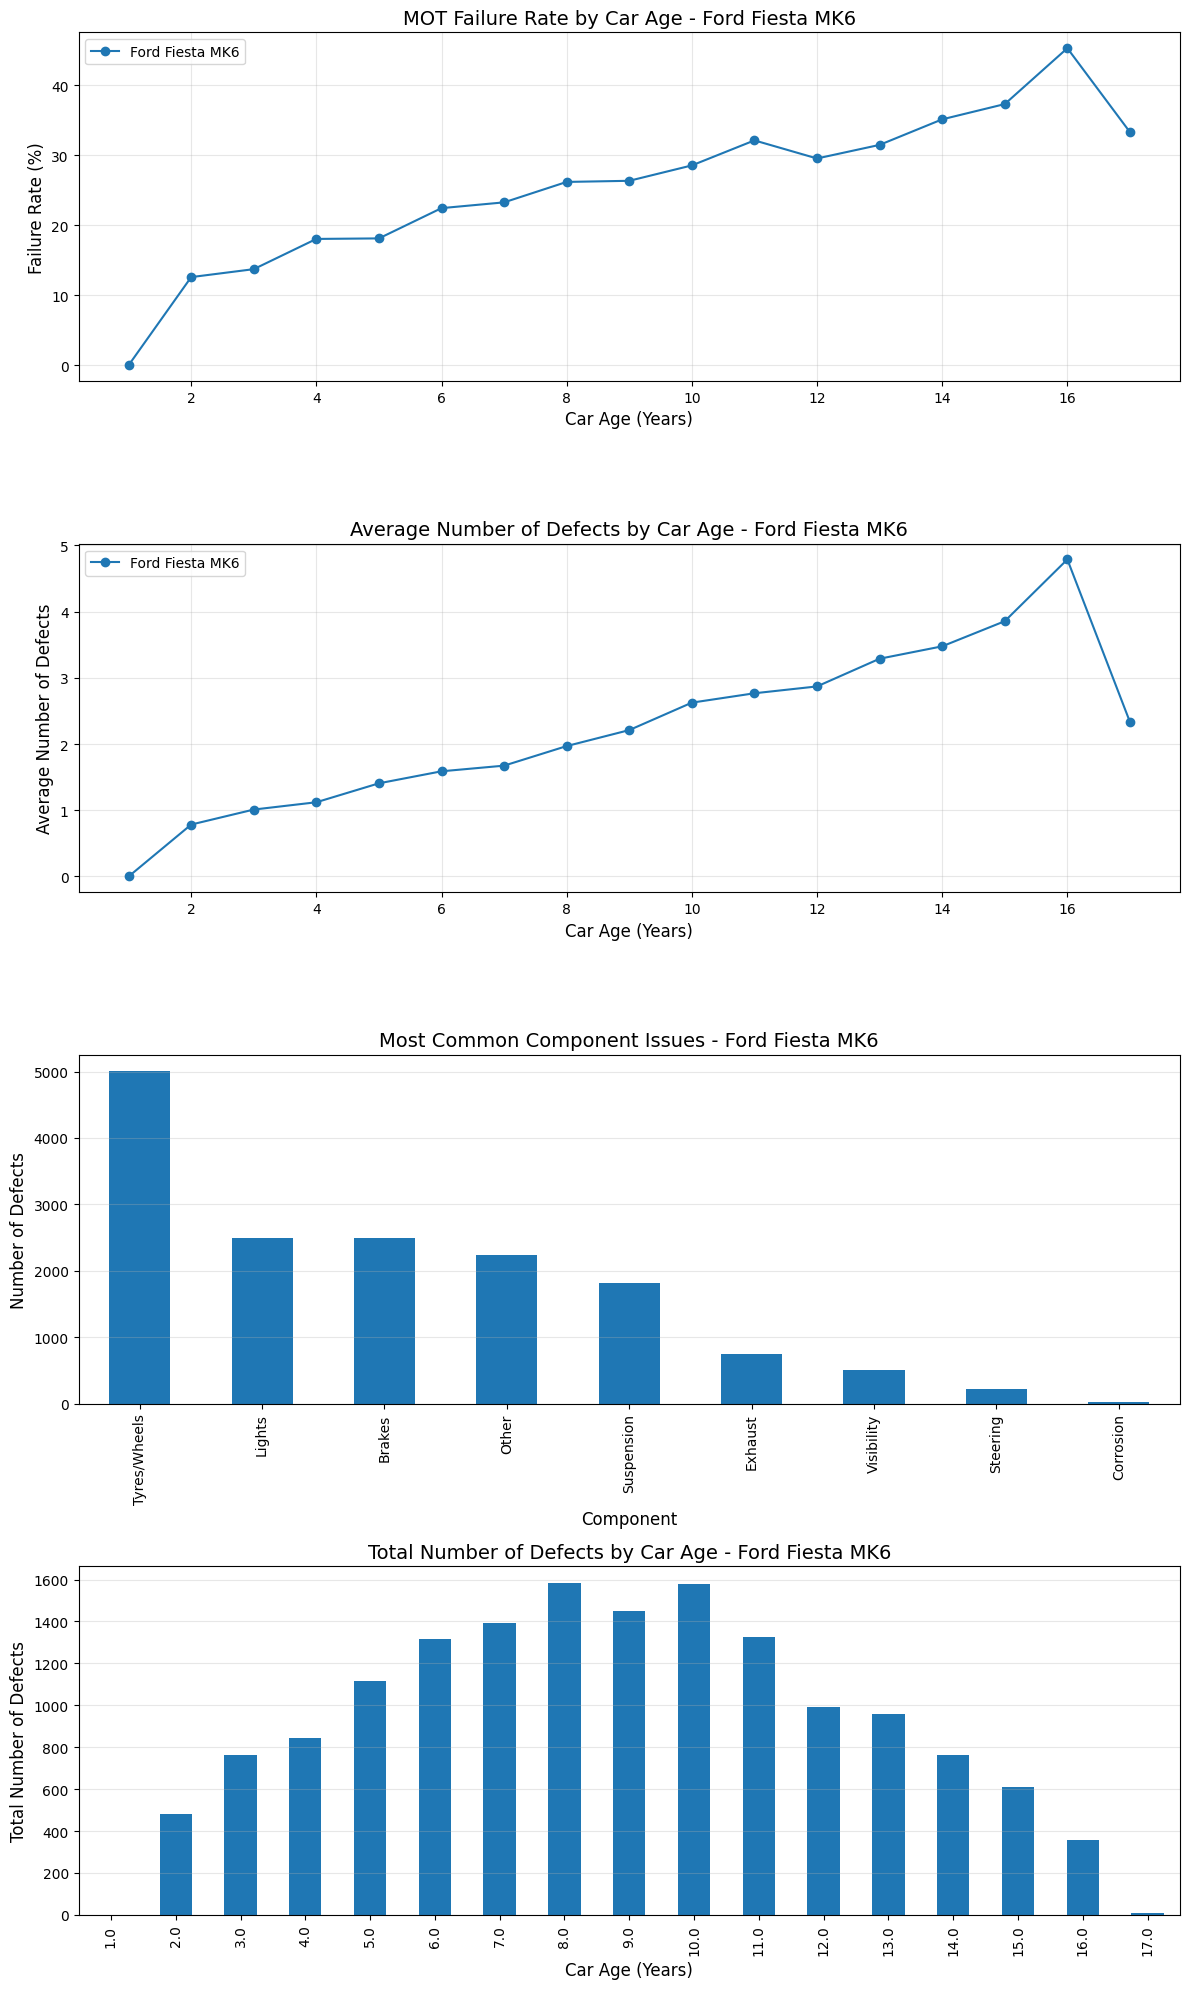

In [22]:
# Process MOT tests data for Ford Fiesta MK6
ford_fiesta_mot_tests_df = ford_fiesta_mot_tests

# Prepare data for plotting
fig, axes = plt.subplots(4, 1, figsize=(12, 20))
plt.subplots_adjust(hspace=0.4)

# Color for the plots
color = '#1f77b4'

# Graph 1: MOT Failure Rate by Car Age
ax1 = axes[0]
# Group by car age and calculate failure rate
age_groups = ford_fiesta_mot_tests_df.groupby(np.floor(ford_fiesta_mot_tests_df['carAgeYears']))
failure_rates = age_groups.apply(lambda x: (x['testResult'] == 'FAILED').sum() / len(x) * 100)
    
# Plot
failure_rates.plot(kind='line', marker='o', ax=ax1, label='Ford Fiesta MK6', color=color)

ax1.set_title('MOT Failure Rate by Car Age - Ford Fiesta MK6', fontsize=14)
ax1.set_xlabel('Car Age (Years)', fontsize=12)
ax1.set_ylabel('Failure Rate (%)', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.legend()

# Graph 2: Average Number of Defects by Car Age
ax2 = axes[1]
# Group by car age and calculate average defect count
age_groups = ford_fiesta_mot_tests_df.groupby(np.floor(ford_fiesta_mot_tests_df['carAgeYears']))
avg_defects = age_groups['defectCount'].mean()
    
# Plot
avg_defects.plot(kind='line', marker='o', ax=ax2, label='Ford Fiesta MK6', color=color)

ax2.set_title('Average Number of Defects by Car Age - Ford Fiesta MK6', fontsize=14)
ax2.set_xlabel('Car Age (Years)', fontsize=12)
ax2.set_ylabel('Average Number of Defects', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.legend()

# Graph 3: Most Common Component Issues
ax3 = axes[2]

# Extract component data from the defects
defects_df = ford_fiesta_defects
component_counts = defects_df['component'].value_counts().sort_values(ascending=False).head(10)

# Plot
component_counts.plot(kind='bar', ax=ax3, color=color)

ax3.set_title('Most Common Component Issues - Ford Fiesta MK6', fontsize=14)
ax3.set_xlabel('Component', fontsize=12)
ax3.set_ylabel('Number of Defects', fontsize=12)
ax3.grid(True, alpha=0.3, axis='y')

# Graph 4: Total Number of Defects by Car Age (Histogram)
ax4 = axes[3]

# Group by car age and sum the defect counts
age_groups = ford_fiesta_mot_tests_df.groupby(np.floor(ford_fiesta_mot_tests_df['carAgeYears']))
total_defects = age_groups['defectCount'].sum()

# Plot as histogram
total_defects.plot(kind='bar', ax=ax4, color=color)

ax4.set_title('Total Number of Defects by Car Age - Ford Fiesta MK6', fontsize=14)
ax4.set_xlabel('Car Age (Years)', fontsize=12)
ax4.set_ylabel('Total Number of Defects', fontsize=12)
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()
